# Higgs Dataset

## What happens when you smash things together near the speed of light?

The Higgs boson has been sought after for decades. Can we use machine learning to gather any more information about it?

In [1]:
import pandas as pd
import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
callback = keras.callbacks.TensorBoard(log_dir='./logs',histogram_freq=0, batch_size=32, write_graph=True)
%matplotlib inline
np.random.seed(0)

Using TensorFlow backend.


In [2]:
column_names = ['Class Label', 'lepton pT', 'lepton eta', 
                'lepton phi', 'missing energy magnitude',
                'missing energy phi', 'jet 1 pt', 'jet 1 eta',
                'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt',  'jet 2 eta', 
                'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 
                'jet 3 phi',' jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 
                'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 
                'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
               ]

In [3]:
df = pd.read_csv('datasets/HIGGS.csv', names = column_names)

In [4]:
callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True)

In [5]:
df.head()

,Class Label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [6]:
df.describe()

,Class Label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,...,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


In [7]:
df.isnull().values.any()

False

In [8]:
labels = df["Class Label"]
labels.head()

df.drop(["Class Label"], axis=1, inplace=True)
df.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [9]:
#Try using decision tree
scaler = StandardScaler()
scaler.fit(df)
scaled_X_vals = scaler.transform(df)
X_train, X_test, y_train, y_test = train_test_split(scaled_X_vals, labels, test_size=0.5)


In [11]:
clf = DecisionTreeClassifier()
fitted = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("f1 score: {}".format(f1))

f1 score: 0.6783970129475747


In [12]:

# from sklearn import tree
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=df.keys(),  
#                          class_names=["No Higgs","Higgs"],  
#                          filled=True, rounded=True,  
#                          special_characters=True)
# graph = graphviz.Source(dot_data)
# graph
#Takes too long


In [13]:
X_train.shape

(5500000, 28)

In [14]:
loss_result = []
accuracy_result = []
label_result = []

In [15]:
from keras.models import Sequential
from keras.layers import Dense
seq_model = Sequential()
seq_model.add(Dense(28, activation='sigmoid', input_shape=(28,)))
seq_model.add(Dense(16, activation='sigmoid'))
seq_model.add(Dense(4, activation='sigmoid'))
seq_model.add(Dense(1, activation='sigmoid'))
seq_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 1,349
Trainable params: 1,349
Non-trainable params: 0
_________________________________________________________________


In [16]:
ret_val = seq_model.fit(X_train, y_train, 
              batch_size=64, epochs=10, 
              verbose=1, validation_data=(X_test, y_test),
              callbacks=[callback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/10
5500000/5500000 [==============================] - 153s 28us/step - loss: 0.6722 - acc: 0.5746 - val_loss: 0.6370 - val_acc: 0.6347
Epoch 2/10
5500000/5500000 [==============================] - 163s 30us/step - loss: 0.6268 - acc: 0.6503 - val_loss: 0.6142 - val_acc: 0.6667
Epoch 3/10
5500000/5500000 [==============================] - 180s 33us/step - loss: 0.5996 - acc: 0.6793 - val_loss: 0.5843 - val_acc: 0.6926
Epoch 4/10
5500000/5500000 [==============================] - 190s 35us/step - loss: 0.5736 - acc: 0.6998 - val_loss: 0.5631 - val_acc: 0.7065
Epoch 5/10
5500000/5500000 [==============================] - 174s 32us/step - loss: 0.5569 - acc: 0.7113 - val_loss: 0.5506 - val_acc: 0.7160
Epoch 6/10
5500000/5500000 [==============================] - 171s 31us/step - loss: 0.5478 - acc: 0.7176 - val_loss: 0.5439 - val_acc: 0.7204
Epoch 7/10
5500000/5500000 [==============================] - 175s 32us/step - loss: 0.5

In [17]:
loss_result.append(".53")
accuracy_result.append(".72")
label_result.append("4LySigBinCrosSGD")

In [50]:
tanh_model = Sequential()
tanh_model.add(Dense(28, activation='tanh', input_shape=(28,)))
tanh_model.add(Dense(16, activation='tanh'))
tanh_model.add(Dense(4, activation='tanh'))
tanh_model.add(Dense(1, activation='sigmoid'))
tanh_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
tanh_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_28 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 5         
Total params: 1,349
Trainable params: 1,349
Non-trainable params: 0
_________________________________________________________________


AttributeError: 'Sequential' object has no attribute 'keys'

In [19]:
mallback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=True, write_images=False, embeddings_freq=0, embeddings_layer_names=False, embeddings_metadata=None)

In [51]:
ret_result = tanh_model.fit(X_train, y_train, 
               batch_size=64, epochs=10, 
               verbose=1, validation_data=(X_test, y_test),
               callbacks=[mallback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/10
5500000/5500000 [==============================] - 198s 36us/step - loss: 0.5785 - acc: 0.6925 - val_loss: 0.5508 - val_acc: 0.7154
Epoch 2/10
5500000/5500000 [==============================] - 144s 26us/step - loss: 0.5400 - acc: 0.7228 - val_loss: 0.5334 - val_acc: 0.7273
Epoch 3/10
5500000/5500000 [==============================] - 142s 26us/step - loss: 0.5301 - acc: 0.7302 - val_loss: 0.5267 - val_acc: 0.7326
Epoch 4/10
5500000/5500000 [==============================] - 142s 26us/step - loss: 0.5252 - acc: 0.7335 - val_loss: 0.5231 - val_acc: 0.7347
Epoch 5/10
5500000/5500000 [==============================] - 143s 26us/step - loss: 0.5220 - acc: 0.7357 - val_loss: 0.5202 - val_acc: 0.7368
Epoch 6/10
5500000/5500000 [==============================] - 141s 26us/step - loss: 0.5200 - acc: 0.7371 - val_loss: 0.5190 - val_acc: 0.7379
Epoch 7/10
5500000/5500000 [==============================] - 142s 26us/step - loss: 0.5

In [61]:
display(ret_result.history)

{'acc': [0.69253763636363641,
  0.72279745454545452,
  0.73016545454545456,
  0.73351327272727274,
  0.73571236363636361,
  0.73706690909090911,
  0.73790909090909096,
  0.73862836363636364,
  0.73912145454545453,
  0.73957854545454549],
 'loss': [0.57854886867783284,
  0.54002717553502866,
  0.53006005364192621,
  0.52516268034293434,
  0.52201792437882855,
  0.52000118659834427,
  0.51856294563293459,
  0.51733960099549725,
  0.51631520341283621,
  0.51555496920290855],
 'val_acc': [0.71537672727272728,
  0.72732618181818187,
  0.73259181818181818,
  0.73465454545454545,
  0.73677963636363641,
  0.73785199999999995,
  0.73855490909090904,
  0.73923690909090911,
  0.73925418181818181,
  0.74026418181818177],
 'val_loss': [0.55080517289074982,
  0.53336716985598476,
  0.52667349213894932,
  0.52312577815506678,
  0.52024833676043425,
  0.51895407090273771,
  0.51724811456801678,
  0.51596045256129175,
  0.51628270099778606,
  0.51431050921838939]}

In [21]:
loss_result.append(".59")
accuracy_result.append(".53")
label_result.append("3LyTanhBinCrosSGD")

In [22]:
two_lay = Sequential()
two_lay.add(Dense(28, activation='sigmoid', input_shape=(28,)))
two_lay.add(Dense(10, activation='sigmoid'))
two_lay.add(Dense(1, activation='sigmoid'))
two_lay.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
two_lay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [23]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, y_test),callbacks=[mallback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/5
5500000/5500000 [==============================] - 139s 25us/step - loss: 0.6472 - acc: 0.6181 - val_loss: 0.6269 - val_acc: 0.6490
Epoch 2/5
5500000/5500000 [==============================] - 138s 25us/step - loss: 0.6111 - acc: 0.6653 - val_loss: 0.5930 - val_acc: 0.6837
Epoch 3/5
5500000/5500000 [==============================] - 144s 26us/step - loss: 0.5813 - acc: 0.6934 - val_loss: 0.5720 - val_acc: 0.7005
Epoch 4/5
5500000/5500000 [==============================] - 138s 25us/step - loss: 0.5668 - acc: 0.7044 - val_loss: 0.5617 - val_acc: 0.7077
Epoch 5/5
5500000/5500000 [==============================] - 137s 25us/step - loss: 0.5583 - acc: 0.7111 - val_loss: 0.5546 - val_acc: 0.7144


In [24]:
loss_result.append(".55")
accuracy_result.append(".71")
label_result.append("3LySigBinCrosSGD")

In [25]:
two_lay = Sequential()
two_lay.add(Dense(28, activation='sigmoid', input_shape=(28,)))
two_lay.add(Dense(10, activation='sigmoid'))
two_lay.add(Dense(1, activation='sigmoid'))
two_lay.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
two_lay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [26]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test),callbacks=[mallback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 151s 28us/step - loss: 0.5544 - acc: 0.7112 - val_loss: 0.5338 - val_acc: 0.7271
Epoch 2/6
5500000/5500000 [==============================] - 177s 32us/step - loss: 0.5282 - acc: 0.7311 - val_loss: 0.5237 - val_acc: 0.7341
Epoch 3/6
5500000/5500000 [==============================] - 179s 33us/step - loss: 0.5230 - acc: 0.7342 - val_loss: 0.5209 - val_acc: 0.7355
Epoch 4/6
5500000/5500000 [==============================] - 170s 31us/step - loss: 0.5206 - acc: 0.7358 - val_loss: 0.5193 - val_acc: 0.7367
Epoch 5/6
5500000/5500000 [==============================] - 206s 37us/step - loss: 0.5190 - acc: 0.7369 - val_loss: 0.5192 - val_acc: 0.7368
Epoch 6/6
5500000/5500000 [==============================] - 191s 35us/step - loss: 0.5180 - acc: 0.7376 - val_loss: 0.5170 - val_acc: 0.7379


In [27]:
loss_result.append(".52")
accuracy_result.append(".73")
label_result.append("3LySigBinCrosAdam")

In [28]:
rms_prop = Sequential()
rms_prop.add(Dense(28, activation='sigmoid', input_shape=(28,)))
rms_prop.add(Dense(10, activation='sigmoid'))
rms_prop.add(Dense(1, activation='sigmoid'))
rms_prop.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
rms_prop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [29]:
rms_prop.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test),callbacks=[mallback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 167s 30us/step - loss: 0.5594 - acc: 0.7074 - val_loss: 0.5351 - val_acc: 0.7264
Epoch 2/6
5500000/5500000 [==============================] - 153s 28us/step - loss: 0.5299 - acc: 0.7299 - val_loss: 0.5253 - val_acc: 0.7331
Epoch 3/6
5500000/5500000 [==============================] - 154s 28us/step - loss: 0.5239 - acc: 0.7341 - val_loss: 0.5236 - val_acc: 0.7344
Epoch 4/6
5500000/5500000 [==============================] - 156s 28us/step - loss: 0.5216 - acc: 0.7358 - val_loss: 0.5246 - val_acc: 0.7331
Epoch 5/6
5500000/5500000 [==============================] - 144s 26us/step - loss: 0.5202 - acc: 0.7366 - val_loss: 0.5195 - val_acc: 0.7370
Epoch 6/6
5500000/5500000 [==============================] - 153s 28us/step - loss: 0.5192 - acc: 0.7374 - val_loss: 0.5190 - val_acc: 0.7376


In [30]:
loss_result.append(".51")
accuracy_result.append(".73")
label_result.append("3LySigBinCrosRMSP")

In [31]:
kld = Sequential()
kld.add(Dense(28, activation='sigmoid', input_shape=(28,)))
kld.add(Dense(10, activation='sigmoid'))
kld.add(Dense(1, activation='sigmoid'))
kld.compile(loss='kullback_leibler_divergence', optimizer='rmsprop', metrics=['accuracy'])
kld.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [32]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test),callbacks=[mallback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 153s 28us/step - loss: 0.5172 - acc: 0.7380 - val_loss: 0.5173 - val_acc: 0.7375
Epoch 2/6
5500000/5500000 [==============================] - 166s 30us/step - loss: 0.5166 - acc: 0.7384 - val_loss: 0.5165 - val_acc: 0.7382
Epoch 3/6
5500000/5500000 [==============================] - 176s 32us/step - loss: 0.5162 - acc: 0.7385 - val_loss: 0.5172 - val_acc: 0.7378
Epoch 4/6
5500000/5500000 [==============================] - 159s 29us/step - loss: 0.5158 - acc: 0.7388 - val_loss: 0.5149 - val_acc: 0.7395
Epoch 5/6
5500000/5500000 [==============================] - 164s 30us/step - loss: 0.5156 - acc: 0.7387 - val_loss: 0.5151 - val_acc: 0.7391
Epoch 6/6
5500000/5500000 [==============================] - 159s 29us/step - loss: 0.5154 - acc: 0.7391 - val_loss: 0.5143 - val_acc: 0.7399


In [33]:
loss_result.append(".51")
accuracy_result.append(".74")
label_result.append("3LySigBinCrosAdam2nd")

In [41]:
poisson = Sequential()
poisson.add(Dense(28, activation='sigmoid', input_shape=(28,)))
poisson.add(Dense(10, activation='sigmoid'))
poisson.add(Dense(1, activation='sigmoid'))
poisson.compile(loss='poisson', optimizer='rmsprop', metrics=['accuracy'])
poisson.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [36]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test), callbacks=[mallback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 195s 35us/step - loss: 0.5152 - acc: 0.7391 - val_loss: 0.5146 - val_acc: 0.7395
Epoch 2/6
5500000/5500000 [==============================] - 188s 34us/step - loss: 0.5151 - acc: 0.7393 - val_loss: 0.5148 - val_acc: 0.7391
Epoch 3/6
5500000/5500000 [==============================] - 187s 34us/step - loss: 0.5149 - acc: 0.7394 - val_loss: 0.5145 - val_acc: 0.7396
Epoch 4/6
5500000/5500000 [==============================] - 175s 32us/step - loss: 0.5146 - acc: 0.7396 - val_loss: 0.5139 - val_acc: 0.7400
Epoch 5/6
5500000/5500000 [==============================] - 207s 38us/step - loss: 0.5145 - acc: 0.7397 - val_loss: 0.5141 - val_acc: 0.7400
Epoch 6/6
5500000/5500000 [==============================] - 167s 30us/step - loss: 0.5142 - acc: 0.7399 - val_loss: 0.5138 - val_acc: 0.7399


In [ ]:
#Duplicate run of previously run model :(
# loss_result.append(".51")
# accuracy_result.append(".73")
# label_result.append("3LySigBinCrosAdam2nd")

In [37]:
kld.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test),callbacks=[mallback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 166s 30us/step - loss: 7.5472e-04 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 2/6
5500000/5500000 [==============================] - 158s 29us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 3/6
5500000/5500000 [==============================] - 150s 27us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 4/6
5500000/5500000 [==============================] - 159s 29us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 5/6
5500000/5500000 [==============================] - 162s 29us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301
Epoch 6/6
5500000/5500000 [==============================] - 158s 29us/step - loss: -7.5802e-07 - acc: 0.5297 - val_loss: -7.5734e-07 - val_acc: 0.5301


In [47]:
loss_result.append(".0000007")
accuracy_result.append(".53")
label_result.append("3LyKLDRmsProp")

In [42]:
poisson.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test),callbacks=[mallback])

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 165s 30us/step - loss: 0.8033 - acc: 0.7060 - val_loss: 0.7916 - val_acc: 0.7259
Epoch 2/6
5500000/5500000 [==============================] - 148s 27us/step - loss: 0.7892 - acc: 0.7292 - val_loss: 0.7872 - val_acc: 0.7325
Epoch 3/6
5500000/5500000 [==============================] - 148s 27us/step - loss: 0.7864 - acc: 0.7330 - val_loss: 0.7860 - val_acc: 0.7337
Epoch 4/6
5500000/5500000 [==============================] - 158s 29us/step - loss: 0.7854 - acc: 0.7345 - val_loss: 0.7850 - val_acc: 0.7354
Epoch 5/6
5500000/5500000 [==============================] - 212s 38us/step - loss: 0.7848 - acc: 0.7353 - val_loss: 0.7850 - val_acc: 0.7353
Epoch 6/6
5500000/5500000 [==============================] - 190s 35us/step - loss: 0.7845 - acc: 0.7354 - val_loss: 0.7843 - val_acc: 0.7363


In [43]:
loss_result.append(".78")
accuracy_result.append(".73")
label_result.append("3LySigPoisRMS")

In [ ]:
def create_model(activation_fn, loss_fn, optimizer_fn):
    seq = Sequential()
    seq.add(Dense(28, activation=activation_fn, input_shape=(28,)))
    seq.add(Dense(10, activation=activation_fn))
    seq.add(Dense(1, activation=activation_fn))
    seq.compile(loss=loss_fn, optimizer=optimizer_fn, metrics=['accuracy'])
    seq.summary()
    return seq

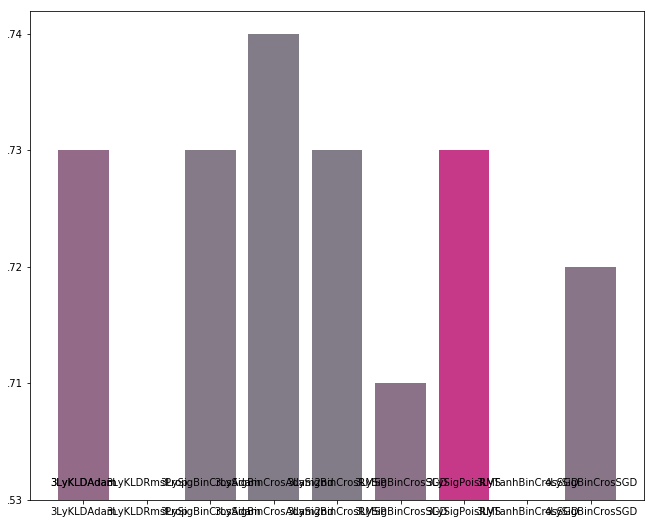

In [48]:
import matplotlib as plt
import matplotlib.pyplot as plot

# display(loss_result.pop(7))
# display(loss_result)
accycolor = []
#Generate Colors on red/green axis based on execution time
for index in range(0,len(loss_result)):
    
    percent_red = float(loss_result[index])
    percent_green = 1 - percent_red
    red_10 = int(percent_red * 255)
    green_10 = int(percent_green * 255)
    red_16 = str(hex(red_10))[-2:].replace("x", "0")
    green_16 = str(hex(green_10))[-2:].replace("x", "0")
    accycolor.append("#"+str(red_16)+str(green_16)+"88")

fig, ax = plot.subplots(figsize=(11, 9))
rects = ax.bar(label_result, accuracy_result, color=accycolor)
random_chance = 0
# plot.axhline(y=random_chance, color='r', linestyle='-')
ax.set_ylim(ymin=0)
# Indicate Times.
labels = ["%s" % l for l in label_result]


plot.plot()
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width() / 2, .1, label,ha='center', va='bottom')

THIS IS AN A AMZING DATASET


[]

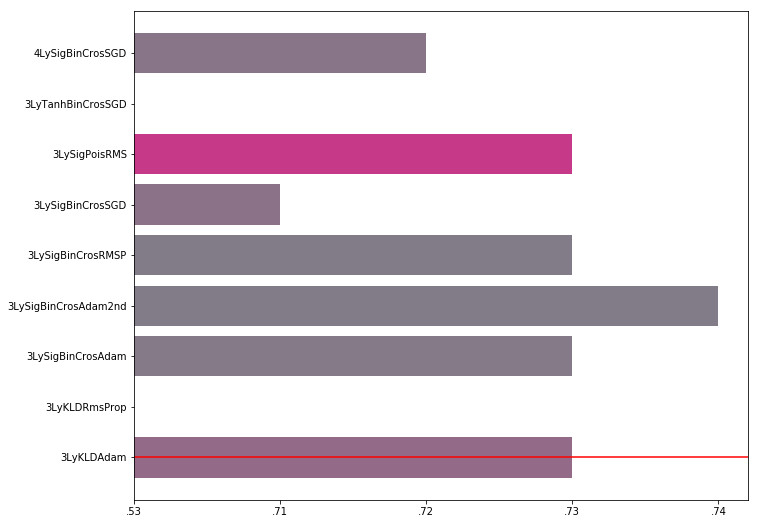

In [49]:
losscolor = []
#Generate Colors on red/green axis based on execution time
for index in range(0,len(loss_result)):
    
    percent_red = float(loss_result[index])
    percent_green = 1 - percent_red
    red_10 = int(percent_red * 255)
    green_10 = int(percent_green * 255)
    red_16 = str(hex(red_10))[-2:].replace("x", "0")
    green_16 = str(hex(green_10))[-2:].replace("x", "0")
    losscolor.append("#"+str(red_16)+str(green_16)+"88")

fig, ax = plot.subplots(figsize=(11, 9))

print('THIS IS AN A AMZING DATASET')
# print(type(left))
rects = ax.barh(label_result, accuracy_result, color=accycolor)
random_chance = 0
plot.axhline(y=random_chance, color='r', linestyle='-')

# Indicate Times.
labels = ["%s" % l for l in label_result]


plot.plot()
# for rect, label in zip(rects, labels):
#     ax.text(rect.get_x() + rect.get_width() / 2, .1, label,ha='center', va='bottom')